<a href="https://colab.research.google.com/github/Sulfika715/DeepLearning/blob/master/Ritel_Cola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import io
sns.set(style="darkgrid")
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

uploaded = files.upload()

Saving ritel_cola.csv to ritel_cola.csv


In [3]:
import io

df = pd.read_csv(io.BytesIO(uploaded['ritel_cola.csv']),skipinitialspace=True)
df.head()
#Data asli ritel_cola

,No,Ritel,Latitude,Longitude,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,REB,-7.008217,110.464989,NaN,NaN,NaN,NaN
1,2,VAP,-7.003715,110.450943,NaN,NaN,NaN,NaN
2,3,FGC,-6.984527,110.454158,NaN,NaN,NaN,NaN
3,4,WTD,-7.036279,110.462789,NaN,NaN,NaN,NaN
4,5,EVC,-6.978589,110.450249,NaN,NaN,NaN,NaN


In [4]:
#untuk menghapus kolom yang tidak diperlukan
df2 = df[['No','Ritel','Latitude','Longitude']]
df2.head()

,No,Ritel,Latitude,Longitude
0,1,REB,-7.008217,110.464989
1,2,VAP,-7.003715,110.450943
2,3,FGC,-6.984527,110.454158
3,4,WTD,-7.036279,110.462789
4,5,EVC,-6.978589,110.450249


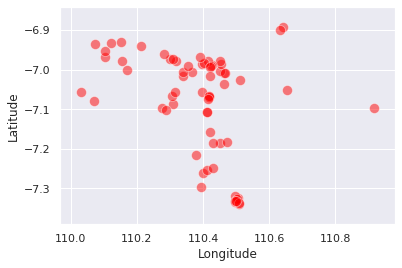

In [5]:
sns.scatterplot(x="Longitude", y="Latitude", data=df2, s=100, color="red", alpha = 0.5)

In [6]:
#Menentukan variabel cluster
ritel_x = df2.iloc[:, 2:4]
ritel_x.head()

,Latitude,Longitude
0,-7.008217,110.464989
1,-7.003715,110.450943
2,-6.984527,110.454158
3,-7.036279,110.462789
4,-6.978589,110.450249


In [0]:
#membuat array
x_array =  np.array(ritel_x)
print(x_array)

[[ -7.008217 110.464989]
 [ -7.003715 110.450943]
 [ -6.984527 110.454158]
 [ -7.036279 110.462789]
 [ -6.978589 110.450249]
 [ -7.024817 110.511323]
 [ -7.009584 110.467616]
 [ -7.00641  110.365529]
 [ -6.977364 110.317947]
 [ -7.087666 110.308647]
 [ -6.973566 110.300566]
 [ -6.959072 110.283418]
 [ -7.015937 110.338447]
 [ -7.067615 110.307174]
 [ -7.097256 110.27487 ]
 [ -7.055325 110.315241]
 [ -7.00553  110.33919 ]
 [ -6.972632 110.308671]
 [ -6.989852 110.355891]
 [ -7.102746 110.287581]
 [ -7.158555 110.421421]
 [ -7.215532 110.378193]
 [ -7.186135 110.45223 ]
 [ -7.260964 110.400462]
 [ -7.297148 110.394945]
 [ -7.182704 110.473887]
 [ -7.25469  110.41252 ]
 [ -7.186346 110.430766]
 [ -7.248132 110.429553]
 [ -7.340652 110.510407]
 [ -7.325611 110.504508]
 [ -7.334754 110.498087]
 [ -7.319632 110.497673]
 [ -7.326244 110.501578]
 [ -7.331124 110.496686]
 [ -7.338103 110.509114]
 [ -7.332914 110.498736]
 [ -7.051089 110.654738]
 [ -7.097768 110.918257]
 [ -6.891375 110.640734]


In [0]:
# menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

# membuat fungsi k-means
kmeans = KMeans(n_clusters = 5, random_state=123)

# Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [0]:
#menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.51100742 0.39811375]
 [0.07008594 0.49579451]
 [0.80842732 0.09930538]
 [0.79176599 0.76702337]
 [0.77287896 0.41428284]]


In [0]:
#menampilkan hasil cluster
print(kmeans.labels_)

[4 4 4 4 4 4 4 4 4 0 4 4 4 0 0 0 4 4 4 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4]


In [0]:
df2["kluster"] = kmeans.labels_
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,No,Ritel,Latitude,Longitude,kluster
0,1,REB,-7.008217,110.464989,4
1,2,VAP,-7.003715,110.450943,4
2,3,FGC,-6.984527,110.454158,4
3,4,WTD,-7.036279,110.462789,4
4,5,EVC,-6.978589,110.450249,4


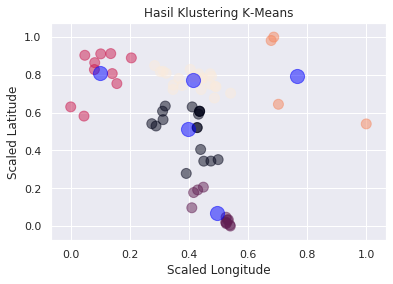

In [0]:
plt.figsct = plt.scatter(x_scaled[:,1], x_scaled[:,0], s = 100, c = df2.kluster, marker = "o", alpha = 0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='blue', s=200, alpha=0.5);
plt.title("Hasil Klustering K-Means")
plt.xlabel("Scaled Longitude")
plt.ylabel("Scaled Latitude")
plt.show()

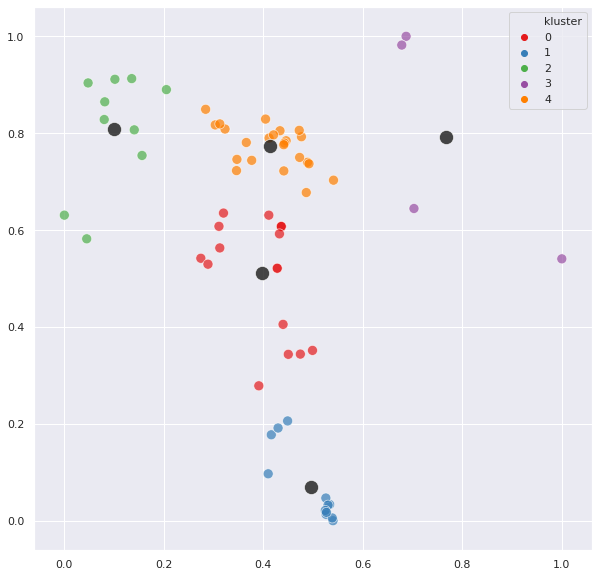

In [0]:
plt.figure(figsize=[10,10])
sns.scatterplot(x_scaled[:,1], x_scaled[:,0], hue = df2.kluster, palette="Set1", s = 100, alpha = 0.7)
sns.scatterplot(centers[:,1], centers[:,0], color = "k", s = 200, alpha = 0.8);